In [1]:
!pip install wordcloud

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

PATH = os.path.abspath(os.path.join(os.getcwd()))

In [2]:
database= os.path.join(PATH, "data.csv")
complete_database = pd.read_csv(database, na_values='')
#complete_database.columns = ['Source', 'ReviewDate', 'SKU_Seller', 'ReviewUser', 'ReviewRate', 'ReviewTitle','ReviewText']
# complete_database.rename(columns={'t2_all_fr_reviews.id_source': 'Source', 't2_all_fr_reviews.reviewdate': 'ReviewDate', 't2_all_fr_reviews.sku_seller': 'SKU_Seller', 't2_all_fr_reviews.reviewuser': 'ReviewUser', 't2_all_fr_reviews.reviewrate': 'ReviewRate', 't2_all_fr_reviews.reviewtitle': 'ReviewTitle','t2_all_fr_reviews.reviewtext': 'ReviewText' }, inplace=True)

In [3]:
complete_database.head()

,retailer_id,product_brand,review_title,author_id,review_date,mark,review_txt,product,product_id
0,AMAZON_fr,L'Oréal,Doux,amzn1.account.AGSGB5N3O3HPWKUIUMKEDDTAVM3A,2 décembre 2018,"5,0",Tres nkn schampoing,L'Oréal Professionnel - Shampooing Absolut Rep...,18165
1,AMAZON_fr,L'Oréal,PRODUIT,amzn1.account.AGXSHDAXG54ONTQJEDHYTDLIIATQ,15 août 2018,"5,0",TRÉS UTILES POUR LES PERSONNES CONCERNÉS.,L' Oréal Professionnel Shampooing Magnésium Si...,2525503
2,AMAZON_fr,L'Oréal,Produit efficace,amzn1.account.AFMKE3ZJZLMUM47XMJU4525YX5BQ,28 octobre 2017,"5,0",Le produit est efficace après trois applicatio...,L'Oréal Paris Progress Homme Gel de Repigmenta...,420337001
3,AMAZON_fr,L'Oréal,Un soin en salon accessible chez soi,amzn1.account.AEBR3NV7FW3YSG27SLGLWWJY72RA,14 octobre 2017,"5,0",Avec la gamme Absolut Repair de L'Oréal votre ...,L'Oréal Professionnel - Série Expert Absolut R...,NaN
4,AMAZON_fr,L'Oréal,Satisfaite,amzn1.account.AGF6AEXX3OA7JEG4EQOD2V74LC5Q,6 décembre 2016,"5,0",Application simple et rapide et laisse une bel...,L'Oréal Paris Infaillible Base de Maquillage P...,45269


## Read data from CSV file

In [24]:
k = 7
process = "Process2_b"
algorithm = "NMF"
doc_topic_matrix_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), "doc_topic_matrix.csv")
word_topic_matrix_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), "word_topic_matrix.csv")
    #dictionary_filepath = os.path.join(PATH, "data", "lda_output", "dictionary.csv")

In [25]:
doc_topic_matrix = pd.read_csv(doc_topic_matrix_filepath, encoding='utf-8', sep=";")
word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
# dictionary = pd.read_csv(dictionary_filepath, encoding='utf-8')

In [26]:
word_topic_matrix = word_topic_matrix.drop(['Unnamed: 0'], axis=1)
doc_topic_matrix = doc_topic_matrix.drop(['Unnamed: 0'], axis=1)

nb_topics = word_topic_matrix.shape[1] - 1
nb_documents = doc_topic_matrix.shape[0]

In [11]:
word_topic_matrix.head(10)

,term,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,7e,0.001093,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003098,0.000000,0.001270,0.00000
1,abandonner,0.006138,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000225,0.000021,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,abasourdi,0.000000,0.0,0.000000,0.000673,0.000000,0.004796,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,abim,0.001330,0.0,0.002058,0.002983,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.008536,0.000000,0.000000,0.000000,0.00517
4,abime,0.000000,0.0,0.000400,0.018961,0.000000,0.000000,0.0,0.000000,0.007684,...,0.0,0.000000,0.000000,0.0,0.000000,0.013375,0.000000,0.000000,0.008066,0.00000
5,abiment,0.000000,0.0,0.000000,0.000000,0.001084,0.000746,0.0,0.000000,0.000000,...,0.0,0.001350,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001676,0.00000
6,abimer,0.000000,0.0,0.000000,0.085284,0.000000,0.001289,0.0,0.002834,0.000000,...,0.0,0.000000,0.000000,0.0,0.001600,0.000164,0.000000,0.002749,0.000000,0.02699
7,abimé,0.000000,0.0,0.000000,0.042815,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.006453,0.000000,0.000000,0.000000,0.000000,0.00000
8,abimée,0.000000,0.0,0.000000,0.014513,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,abitude,0.000000,0.0,0.000041,0.000000,0.000000,0.000349,0.0,0.001059,0.000143,...,0.0,0.000000,0.000000,0.0,0.000568,0.000257,0.000000,0.000044,0.000000,0.00000


## Create dict for the visualization 

In [9]:
# #%% create pandas dataframe for the topics

# df = pd.DataFrame({"feature_name": feature_names})
# for topic_idx, topic in enumerate(word_topic_matrix):
#     df["topic_" + str(topic_idx)] = word_topic_matrix[topic_idx].values


In [7]:
words_topic_list = [0]*nb_topics
for i in range(nb_topics):
    words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()

doc_topic_list = [0]*nb_documents
for i in range(nb_documents):
    doc_topic_list[i] = pd.Series(doc_topic_matrix.iloc[i].drop(['documents']).values).sort_values(ascending=False).to_dict()

## Visualize top 10 words of each topic

In [9]:
import heapq
from operator import itemgetter

def best_words(k, *mywords_topic , nb_words=10):
    n_row = len(mywords_topic)
    n_col = 1
    txt_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), process + "_top_words.txt")
    print(txt_filepath)
    file = open(txt_filepath, 'w')
    file.write('Here are the most important {} words for each topic'.format(nb_words))
    for index,item in enumerate(mywords_topic):
        
        file.write('\nTopic number {0} :'.format(index))
        for term, frequency in dict(heapq.nlargest(nb_words, item.items(), key=itemgetter(1))).items():
            file.write(u'\n\t{:20}\t{:.3f}'.format(term, round(frequency, 3)))
    file.close()

myarg = words_topic_list
best_words( k, *myarg, nb_words=10)

D:\3A\KITE\TrendMeter\topic_decomp\NMF_output\k_21\Process2_b_top_words.txt


In [10]:
import heapq
from operator import itemgetter

def best_topics(k, *mydocuments_topic, ratio):
    txt_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), process + "_top_topics.txt")
    file = open(txt_filepath, 'w')
    file.write('Here are the topics of each document')
    for index, item in enumerate(mydocuments_topic):
        file.write('\n{:20}'.format(doc_topic_matrix.iloc[index].documents))
        dictionnary = list(dict(heapq.nlargest(3, item.items(), key=itemgetter(1))).items())
        best_topic = dictionnary[0][1]
        for i in range(3):
            item = dictionnary[i]
            if item[1]>=(1-ratio)*best_topic:
                file.write(u'\n\tTopic ' +str(item[0])+ '\t'+ str(round(item[1], 3)))
    file.close()

myarg = doc_topic_list
best_topics(k, *myarg, ratio = 0.3)

In [27]:
%matplotlib inline

def wdc(*mywords_topic):
   n_row = len(mywords_topic)
   n_col = 1
   plt.figure(figsize = ( n_col * 3 *3,  n_row * 3*2))    
   
   wordcloud = WordCloud()
   i = 0
   for item in mywords_topic:
       wordcloud.fit_words(item)
       plt.subplot(n_row, n_col, i+1)
       plt.title('Topic %s' %str(i+1), size = 16)
       plt.imshow(wordcloud)
       plt.axis("off")
       i += 1


## Create a word cloud for each topic

In [28]:
nb_topics = k
# word_topic_matrix_filepath = "C:\\Users\\Jamila\\OneDrive\\_Inno DataScience\\3.UserVoice\\data\\NMF_output\\k_5\\Process1_b_word_topic_matrix.csv"
word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
words_topic_list = [0]*nb_topics
for i in range(nb_topics):
    words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()


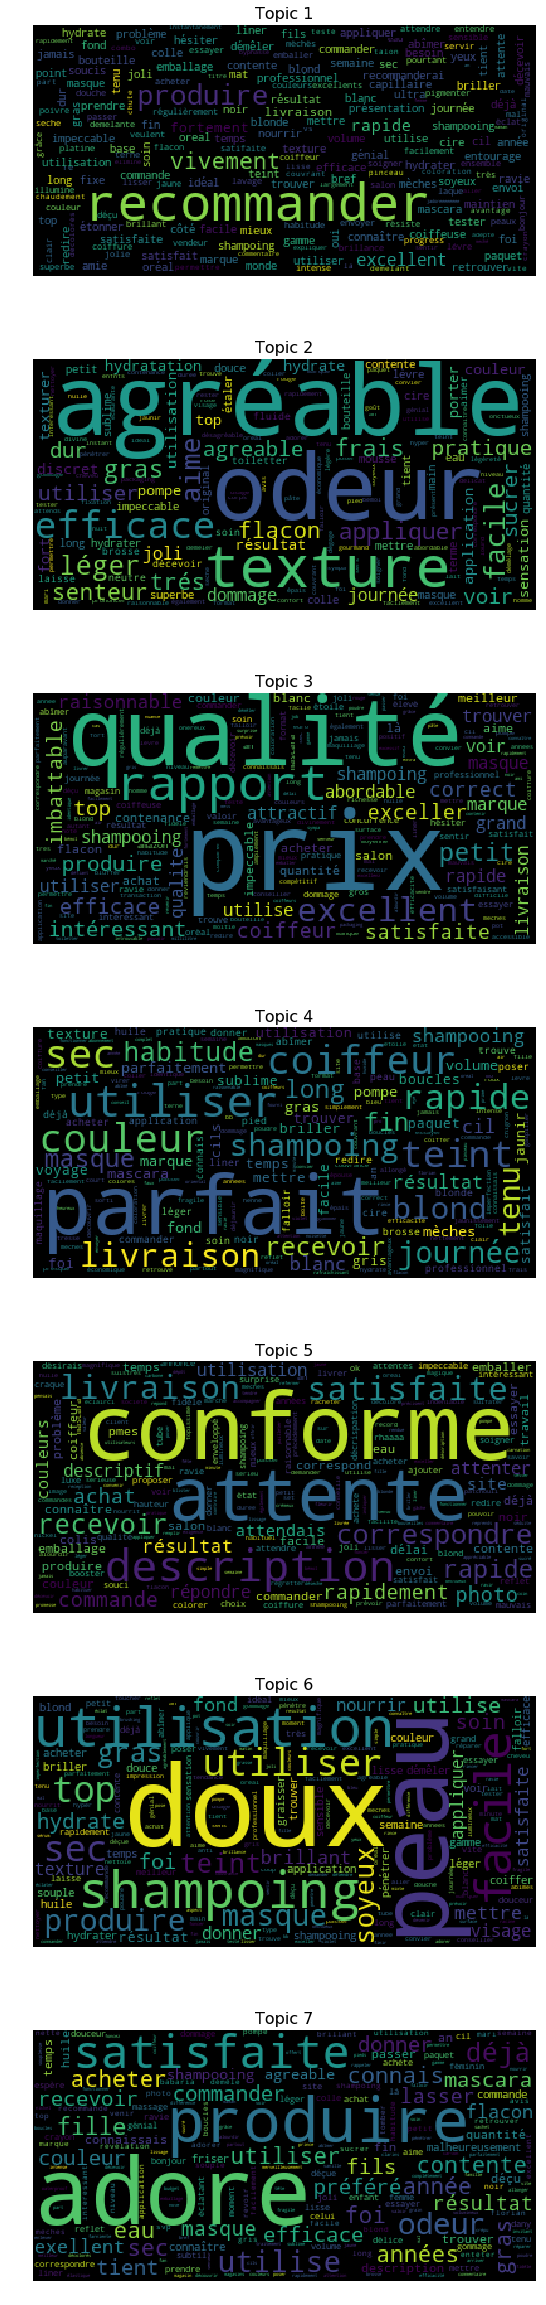

In [29]:
myarg = words_topic_list
wdc(*myarg)

In [ ]:
# process = "Process4_b"
# algorithm = "LSI" # "lda" or "NMF" or "LSI"
# # for process in ["Process5_b", "Process4_b"]:
# # , 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21
# for k in [13, 14, 15, 16, 17, 18, 19, 20, 21]:
#     doc_topic_matrix_filepath = os.path.join(PATH, "data", algorithm + "_output", "k_" + str(k), process + "_doc_topic_matrix.csv")
#     word_topic_matrix_filepath = os.path.join(PATH, "data", algorithm + "_output", "k_" + str(k), process + "_word_topic_matrix.csv")
#     doc_topic_matrix = pd.read_csv(doc_topic_matrix_filepath, encoding='utf-8', sep=";")
#     word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
#     word_topic_matrix = word_topic_matrix.drop(['Unnamed: 0'], axis=1)
#     doc_topic_matrix = doc_topic_matrix.drop(['Unnamed: 0'], axis=1)

#     nb_topics = word_topic_matrix.shape[1] - 1
#     nb_documents = doc_topic_matrix.shape[0]
#     doc_topic_list = [0]*nb_documents
#     for i in range(nb_documents):
#         doc_topic_list[i] = pd.Series(doc_topic_matrix.iloc[i].drop(['documents']).values).sort_values(ascending=False).to_dict()
#     words_topic_list = [0]*nb_topics
#     for i in range(nb_topics):
#         words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()
#     myarg = words_topic_list
#     best_words(k, *myarg, nb_words=10)
#     myarg = doc_topic_list
#     best_topics(k, *myarg, ratio = 0.3)

C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_13\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_14\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_15\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_16\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_17\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_18\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_19\Process4_b_top_words.txt
C:\Users\Jamila\OneDrive\_Inno DataScience\3.UserVoice\data\LSI_output\k_20\Process4_b_top_words.txt
